1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2022-11-11 21:11:19--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-11-11 21:11:19--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31eb0e3413a235dc017c058d44.dl.dropboxusercontent.com/cd/0/inline/BwmOKcln_dZYUZp9caDlcUYdSkdhRp_Q1LOKkk3amDwaHuFSM6FfQuBPLMcFFAmYZTqhcFeJXYndJJv5BlL_Dm-QmNm51eUbVB-zFj0vDHrDN5uG8Bs1sQX4PtVKDZ1Vap-sQt1TbwW4WLgICaNTuf0C_URq2W4k06LY3EkoDqA09g/file# [following]
--2022-11-11 21:11:19--  https://uc31eb0e3413a235dc017c058d44.dl.dropboxusercontent.com/cd/0/inline/BwmOKcln_dZYUZp9caDlcUYdSkdhRp_Q1LOKkk3amDwaHuFSM6FfQuBPLMcFFAmYZTqh

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import numpy as np
import pandas as pd

file_name = "data/data_000637.txt"
idx = len(open(file_name).readlines())
N = max(10000, idx)
df = pd.read_csv(file_name, nrows=N)
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
x = df["BX_COUNTER"].max()
print("Maximum number of BX is: " + str(x))

Maximum number of BX is: 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [4]:
import datetime

abs_times = []

for i, row in df.iterrows():
    timing = row["ORBIT_CNT"]*x*25 + row["BX_COUNTER"]*25 + row["TDC_MEAS"]*(25/30)
    abs_times.append(timing)
    
    
df["ABS_TIME_NS"] = abs_times
print("New dataset: " + "\n")
print(df)

time_series = pd.to_datetime(df["ABS_TIME_NS"], unit="ns")
print("The time series are" + ":\n", time_series)

New dataset: 

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

          ABS_TIME_NS  
0        3.446490e+14  
1        3.446490e+14  
2        3.446490e+14  
3        3.446490e+14  
4        3.446490e+14  


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [5]:
df["ABS_TIME"] = pd.to_timedelta(abs_times)
print("Duration of the data taking in hours is: " + "\n", df) 

Duration of the data taking in hours is: 
          HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

          ABS_TIME_NS               ABS_TIME  
0        3.446490e+14 3 days 23:44:09.004934  
1        3.446490e+14 

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
noise = df.groupby("TDC_CHANNEL").size().sort_values(ascending=False)
noise = noise.iloc[[0,1,2]]
print("Noisy channels are: " + "\n", noise)

Noisy channels are: 
 TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [7]:
cnt = df.groupby("ORBIT_CNT").count()
print("The number of non-empty orbits: ", len(cnt))

The number of non-empty orbits:  11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [8]:
cond = df[df["TDC_CHANNEL"] == 139]["ORBIT_CNT"].unique()
print("The number of unique orbits with at least one measurement from TDC_CHANNEL=139: ", len(cond))

The number of unique orbits with at least one measurement from TDC_CHANNEL=139:  10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [9]:
FPGA_0 = df[df["FPGA"] == 0]
FPGA_1 = df[df["FPGA"] == 1]

print("FPGA_0: " + "\n", pd.Series(FPGA_0.groupby("TDC_CHANNEL").size()))
print("FPGA_1: " + "\n", pd.Series(FPGA_1.groupby("TDC_CHANNEL").size()))

FPGA_0: 
 TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Length: 124, dtype: int64
FPGA_1: 
 TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0, 0.5, 'Count')

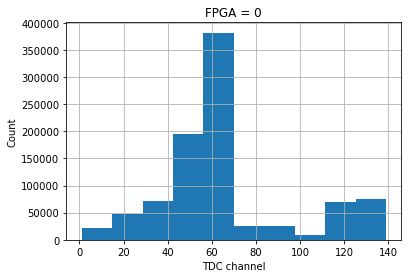

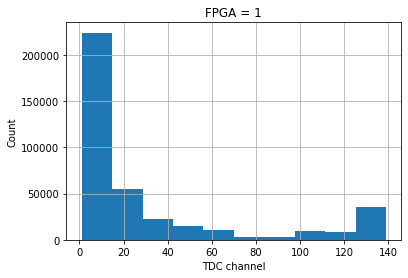

In [10]:
import matplotlib.pyplot as plt

FPGA_0.hist(column = "TDC_CHANNEL")
plt.title("FPGA = 0")
plt.xlabel("TDC channel")
plt.ylabel("Count")

FPGA_1.hist(column = "TDC_CHANNEL")
plt.title("FPGA = 1")
plt.xlabel("TDC channel")
plt.ylabel("Count")